In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE


plt.set_cmap('gray')

# MNIST Dataset

http://yann.lecun.com/exdb/mnist/

In [2]:
mnist = tf.keras.datasets.mnist.load_data()[0]
digits, labels = mnist[0], mnist[1]

8


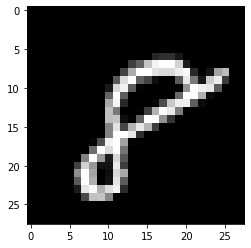

In [3]:
index = -1

_ = plt.imshow(digits[index])
print(labels[index])

In [4]:
len(digits)

60000

8


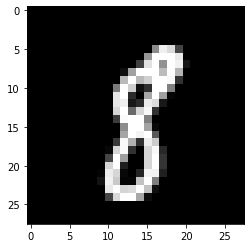

In [5]:
index = 300

_ = plt.imshow(digits[index])
print(labels[index])

6


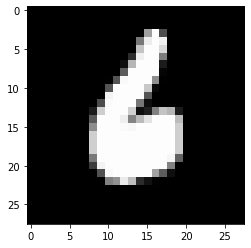

In [6]:
index = 1337

_ = plt.imshow(digits[index])
print(labels[index])

# Exploration

In [7]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

<BarContainer object of 10 artists>

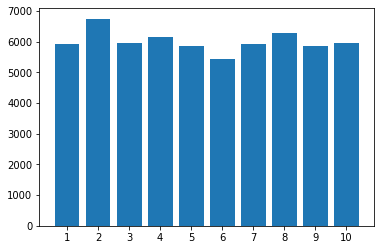

In [10]:
heights, _ = np.histogram(labels)
plot_labels = np.arange(10) + 1
plt.bar(plot_labels, heights, tick_label=plot_labels)

In [11]:
n = 60000

digits_flat = digits.reshape([n, 28*28])

In [12]:
idx = np.random.randint(n, size=1000)
x_sample = digits_flat[idx]
y_sample = labels[idx]

In [13]:
_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
embedding = _tsne.fit_transform(x_sample)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.069s...
[t-SNE] Computed neighbors for 1000 samples in 2.072s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 609.106749
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.297096
[t-SNE] KL divergence after 300 iterations: 1.292077


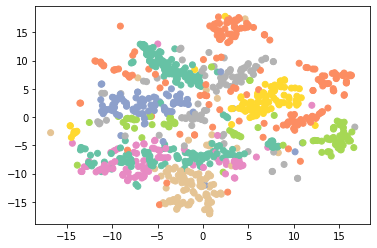

In [14]:
color_map = sns.color_palette("Set2", 10)
colors = [color_map[l-1] for l in y_sample]
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)